In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import sys
pkg_path = "/nfs/students/winter-term-2020/project-1/project-1/audio_classification"
if pkg_path not in sys.path:
    sys.path.append(pkg_path)

pkg_path = "/nfs/students/winter-term-2020/project-1/project-1/foolbox"
if pkg_path not in sys.path:
    sys.path.append(pkg_path)

import os
import yaml
import torch
from audio_classification.tools import attack_model, attack_model_for_randomize_smoothing, attack_model_for_adv

torch.cuda.empty_cache()
#device = torch.device('cpu')
device = (torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu'))
project_dir = '/nfs/students/winter-term-2020/project-1/'
save_folder = '/nfs/students/winter-term-2020/project-1/project-1/attack_results/adv'

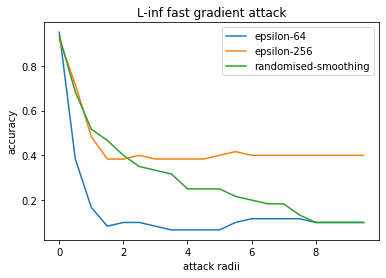

In [26]:
import matplotlib.pyplot as plt
y1 = [0.95, 0.3833333333333333, 0.16666666666666663, 0.08333333333333337, 0.09999999999999998, 0.09999999999999998, 0.08333333333333337, 0.06666666666666665, 0.06666666666666665, 0.06666666666666665, 0.06666666666666665, 0.09999999999999998, 0.1166666666666667, 0.1166666666666667, 0.1166666666666667, 0.1166666666666667, 0.09999999999999998, 0.09999999999999998, 0.09999999999999998, 0.09999999999999998]
y2 = [0.9166666666666666, 0.7166666666666667, 0.4833333333333333, 0.3833333333333333, 0.3833333333333333, 0.4, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.4, 0.41666666666666663, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]
y3 = [0.9333333333333333, 0.6833333333333333, 0.5166666666666666, 0.4666666666666667, 0.4, 0.35, 0.33333333333333337, 0.31666666666666665, 0.25, 0.25, 0.25, 0.21666666666666667, 0.19999999999999996, 0.18333333333333335, 0.18333333333333335, 0.1333333333333333, 0.09999999999999998, 0.09999999999999998, 0.09999999999999998, 0.09999999999999998]
x = list(range(0, 10, 1)) + [i+0.5 for i in list(range(0, 10, 1))]
x.sort()
plt.plot(x, y1, label = "epsilon-64")
plt.plot(x, y2, label = "epsilon-256")
plt.plot(x, y3, label = "randomised-smoothing")
plt.xlabel('attack radii')
# Set the y axis label of the current axis.
plt.ylabel('accuracy')
# Set a title of the current axes.
plt.title('L-inf fast gradient attack')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

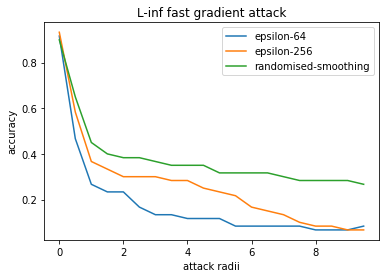

In [27]:
y1 = [0.9166666666666666, 0.4666666666666667, 0.2666666666666667, 0.23333333333333328, 0.23333333333333328, 0.16666666666666663, 0.1333333333333333, 0.1333333333333333, 0.1166666666666667, 0.1166666666666667, 0.1166666666666667, 0.08333333333333337, 0.08333333333333337, 0.08333333333333337, 0.08333333333333337, 0.08333333333333337, 0.06666666666666665, 0.06666666666666665, 0.06666666666666665, 0.08333333333333337]
y2 = [0.9333333333333333, 0.5833333333333333, 0.3666666666666667, 0.33333333333333337, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.2833333333333333, 0.2833333333333333, 0.25, 0.23333333333333328, 0.21666666666666667, 0.16666666666666663, 0.15000000000000002, 0.1333333333333333, 0.09999999999999998, 0.08333333333333337, 0.08333333333333337, 0.06666666666666665, 0.06666666666666665]
y3 = [0.9, 0.65, 0.44999999999999996, 0.4, 0.3833333333333333, 0.3833333333333333, 0.3666666666666667, 0.35, 0.35, 0.35, 0.31666666666666665, 0.31666666666666665, 0.31666666666666665, 0.31666666666666665, 0.30000000000000004, 0.2833333333333333, 0.2833333333333333, 0.2833333333333333, 0.2833333333333333, 0.2666666666666667]
x = list(range(0, 10, 1)) + [i+0.5 for i in list(range(0, 10, 1))]
x.sort()
plt.plot(x, y1, label = "epsilon-64")
plt.plot(x, y2, label = "epsilon-256")
plt.plot(x, y3, label = "randomised-smoothing")
plt.xlabel('attack radii')
# Set the y axis label of the current axis.
plt.ylabel('accuracy')
# Set a title of the current axes.
plt.title('L-inf fast gradient attack')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

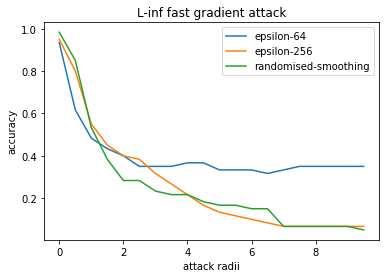

In [28]:
y1 = [0.9333333333333333, 0.6166666666666667, 0.4833333333333333, 0.43333333333333335, 0.4, 0.35, 0.35, 0.35, 0.3666666666666667, 0.3666666666666667, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.31666666666666665, 0.33333333333333337, 0.35, 0.35, 0.35, 0.35, 0.35]
y2= [0.95, 0.8, 0.55, 0.44999999999999996, 0.4, 0.3833333333333333, 0.31666666666666665, 0.2666666666666667, 0.21666666666666667, 0.16666666666666663, 0.1333333333333333, 0.1166666666666667, 0.09999999999999998, 0.08333333333333337, 0.06666666666666665, 0.06666666666666665, 0.06666666666666665, 0.06666666666666665, 0.06666666666666665, 0.06666666666666665]
y3 = [0.9833333333333333, 0.85, 0.5333333333333333, 0.3833333333333333, 0.2833333333333333, 0.2833333333333333, 0.23333333333333328, 0.21666666666666667, 0.21666666666666667, 0.18333333333333335, 0.16666666666666663, 0.16666666666666663, 0.15000000000000002, 0.15000000000000002, 0.06666666666666665, 0.06666666666666665, 0.06666666666666665, 0.06666666666666665, 0.06666666666666665, 0.050000000000000044]
x = list(range(0, 10, 1)) + [i+0.5 for i in list(range(0, 10, 1))]
x.sort()
plt.plot(x, y1, label = "epsilon-64")
plt.plot(x, y2, label = "epsilon-256")
plt.plot(x, y3, label = "randomised-smoothing")
plt.xlabel('attack radii')
# Set the y axis label of the current axis.
plt.ylabel('accuracy')
# Set a title of the current axes.
plt.title('L-inf fast gradient attack')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()



{'MODEL': {'NAME': 'LitCRNN', 'NUM_CLASSES': 6, 'CRNN': {'RANDOMISED_SMOOTHING': False, 'INCLUDE_TOP': True, 'INCLUDE_TRANSFORM': False, 'SMOOTH_ADV': True}}, 'DATASET': {'NAME': 'BMW', 'ANNOTATION_PATH': '/nfs/students/winter-term-2020/project-1/datasets/BMW/meta/bmw.csv', 'FOLDER_PATH': '/nfs/students/winter-term-2020/project-1/datasets/Brake_Noise', 'WEIGHT': 'NORMAL', 'VAL_FOLD': 2, 'AUGMENTATION': 'none', 'NOISE_PATH': '../datasets/MUSAN/free-sound/'}, 'DATALOADER': {'BATCH_SIZE': 8, 'NUM_WORKERS': 20}, 'TRANSFORM': {'HOP_LENGTH': 256}, 'ATTACK_VAL': {'EPS': 64, 'NUM_STEPS': 2, 'MTRAIN': 2, 'NO_GRAD': True, 'MULTI_NOISE': True}, 'LOSS': 'cross_entropy', 'SOLVER': {'LOG_PATH': '../logs/final-adv', 'NUM_GPUS': 1, 'MAX_EPOCH': 55, 'MIN_EPOCH': 1, 'LEARNING_RATE': 0.001, 'WEIGHT_DECAY': 0.001, 'STEP_SIZE': 25, 'SIGMA': 0.25, 'GAMMA': 0.5}, 'CHECKPOINT': {'SAVE_NAME': 'crnn-bmw', 'SAVE_PATH': '../weights/final-adv', 'SAVE_TOP_K': 1}, 'ATTACK': True}
Transformed raw audio into melspectr

/nfs/homedirs/vashisht/anaconda3/envs/project_1/lib/python3.7/site-packages/foolbox/models/pytorch.py:37: UserWarning: The PyTorch model is in training mode and therefore might not be deterministic. Call the eval() method to set it in evaluation mode if this is not intended.
  "The PyTorch model is in training mode and therefore might"


Generated attacks in 1360.67 seconds
[0.95, 0.9333333333333333, 0.9166666666666666, 0.9, 0.8833333333333333, 0.8666666666666667, 0.8333333333333334, 0.8166666666666667, 0.7333333333333334, 0.6666666666666667, 0.6333333333333333, 0.6333333333333333, 0.6166666666666667, 0.5833333333333333, 0.5666666666666667, 0.55, 0.5333333333333333, 0.5333333333333333, 0.5, 0.4833333333333333, 0.4833333333333333, 0.4666666666666667, 0.41666666666666663, 0.4, 0.4, 0.4, 0.4, 0.3833333333333333, 0.3833333333333333, 0.35, 0.35, 0.2833333333333333, 0.2833333333333333, 0.2833333333333333, 0.2833333333333333, 0.2666666666666667, 0.2666666666666667, 0.2666666666666667, 0.2666666666666667, 0.2666666666666667, 0.2666666666666667, 0.2666666666666667, 0.25, 0.25, 0.25, 0.25, 0.25, 0.23333333333333328, 0.23333333333333328, 0.23333333333333328]


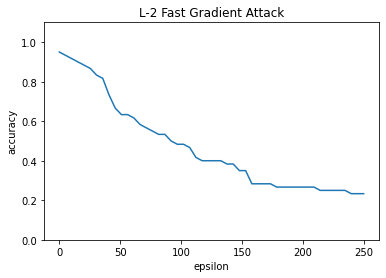

In [2]:
torch.cuda.empty_cache()
project="BMW"
max_rad = 250
title = 'bmw_adv_0.25'
config_path = '/nfs/students/winter-term-2020/project-1/project-1/audio_classification/configs/crnn_bmw-0.25.yaml'
pretrained_path = '/nfs/students/winter-term-2020/project-1/project-1/weights/final-adv/crnn-bmw-adv-sigma-0.25-epoch=44-val_acc=1.000.ckpt'
attack_model_for_adv(project_dir, config_path, pretrained_path, title, 
                                     project=project, attack_type = 'l2', max_radius=max_rad, save_folder=save_folder)

{'MODEL': {'NAME': 'LitCRNN', 'NUM_CLASSES': 6, 'CRNN': {'RANDOMISED_SMOOTHING': False, 'INCLUDE_TOP': True, 'INCLUDE_TRANSFORM': False, 'SMOOTH_ADV': True}}, 'DATASET': {'NAME': 'BMW', 'ANNOTATION_PATH': '/nfs/students/winter-term-2020/project-1/datasets/BMW/meta/bmw.csv', 'FOLDER_PATH': '/nfs/students/winter-term-2020/project-1/datasets/Brake_Noise', 'WEIGHT': 'NORMAL', 'VAL_FOLD': 2, 'AUGMENTATION': 'none', 'NOISE_PATH': '../datasets/MUSAN/free-sound/'}, 'DATALOADER': {'BATCH_SIZE': 8, 'NUM_WORKERS': 20}, 'TRANSFORM': {'HOP_LENGTH': 256}, 'ATTACK_VAL': {'EPS': 64, 'NUM_STEPS': 2, 'MTRAIN': 2, 'NO_GRAD': True, 'MULTI_NOISE': True}, 'LOSS': 'cross_entropy', 'SOLVER': {'LOG_PATH': '../logs/final-adv', 'NUM_GPUS': 1, 'MAX_EPOCH': 55, 'MIN_EPOCH': 1, 'LEARNING_RATE': 0.001, 'WEIGHT_DECAY': 0.001, 'STEP_SIZE': 25, 'SIGMA': 0.5, 'GAMMA': 0.5}, 'CHECKPOINT': {'SAVE_NAME': 'crnn-bmw', 'SAVE_PATH': '../weights/final-adv', 'SAVE_TOP_K': 1}, 'ATTACK': True}
Transformed raw audio into melspectro

/nfs/homedirs/vashisht/anaconda3/envs/project_1/lib/python3.7/site-packages/foolbox/models/pytorch.py:37: UserWarning: The PyTorch model is in training mode and therefore might not be deterministic. Call the eval() method to set it in evaluation mode if this is not intended.
  "The PyTorch model is in training mode and therefore might"


Generated attacks in 1362.19 seconds
[0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.85, 0.8333333333333334, 0.8166666666666667, 0.7833333333333333, 0.7833333333333333, 0.75, 0.75, 0.7333333333333334, 0.7166666666666667, 0.7, 0.6666666666666667, 0.6666666666666667, 0.65, 0.6333333333333333, 0.6333333333333333, 0.6166666666666667, 0.6, 0.5833333333333333, 0.5, 0.4833333333333333, 0.41666666666666663, 0.41666666666666663, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.3666666666666667, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337]


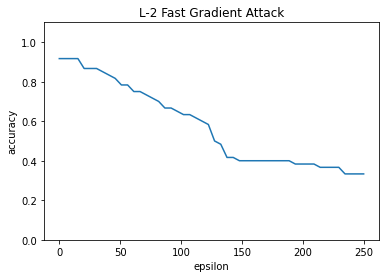

In [3]:
torch.cuda.empty_cache()
project="BMW"
max_rad = 250
title = 'bmw_adv_0.5'
config_path = '/nfs/students/winter-term-2020/project-1/project-1/audio_classification/configs/crnn_bmw-0.5.yaml'
pretrained_path = '/nfs/students/winter-term-2020/project-1/project-1/weights/final-adv/crnn-bmw-adv-sigma-0.5-epoch=31-val_acc=1.000.ckpt'
attack_model_for_adv(project_dir, config_path, pretrained_path, title, 
                                     project=project, attack_type = 'l2', max_radius=max_rad, save_folder=save_folder)

{'MODEL': {'NAME': 'LitCRNN', 'NUM_CLASSES': 6, 'CRNN': {'RANDOMISED_SMOOTHING': False, 'INCLUDE_TOP': True, 'INCLUDE_TRANSFORM': False, 'SMOOTH_ADV': True}}, 'DATASET': {'NAME': 'BMW', 'ANNOTATION_PATH': '/nfs/students/winter-term-2020/project-1/datasets/BMW/meta/bmw.csv', 'FOLDER_PATH': '/nfs/students/winter-term-2020/project-1/datasets/Brake_Noise', 'WEIGHT': 'NORMAL', 'VAL_FOLD': 2, 'AUGMENTATION': 'none', 'NOISE_PATH': '../datasets/MUSAN/free-sound/'}, 'DATALOADER': {'BATCH_SIZE': 8, 'NUM_WORKERS': 20}, 'TRANSFORM': {'HOP_LENGTH': 256}, 'ATTACK_VAL': {'EPS': 64, 'NUM_STEPS': 2, 'MTRAIN': 2, 'NO_GRAD': True, 'MULTI_NOISE': True}, 'LOSS': 'cross_entropy', 'SOLVER': {'LOG_PATH': '../logs/final-adv', 'NUM_GPUS': 1, 'MAX_EPOCH': 55, 'MIN_EPOCH': 1, 'LEARNING_RATE': 0.001, 'WEIGHT_DECAY': 0.001, 'STEP_SIZE': 25, 'SIGMA': 1, 'GAMMA': 0.5}, 'CHECKPOINT': {'SAVE_NAME': 'crnn-bmw', 'SAVE_PATH': '../weights/final-adv', 'SAVE_TOP_K': 1}, 'ATTACK': True}
Transformed raw audio into melspectrogr

/nfs/homedirs/vashisht/anaconda3/envs/project_1/lib/python3.7/site-packages/foolbox/models/pytorch.py:37: UserWarning: The PyTorch model is in training mode and therefore might not be deterministic. Call the eval() method to set it in evaluation mode if this is not intended.
  "The PyTorch model is in training mode and therefore might"


Generated attacks in 1364.24 seconds
[0.9333333333333333, 0.9166666666666666, 0.9, 0.9, 0.8833333333333333, 0.8666666666666667, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8166666666666667, 0.8166666666666667, 0.8, 0.7833333333333333, 0.7666666666666666, 0.7333333333333334, 0.7333333333333334, 0.7166666666666667, 0.6666666666666667, 0.6666666666666667, 0.65, 0.65, 0.65, 0.65, 0.6333333333333333, 0.6333333333333333, 0.5666666666666667, 0.5666666666666667, 0.55, 0.55, 0.5333333333333333, 0.5333333333333333, 0.5333333333333333, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.5166666666666666, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


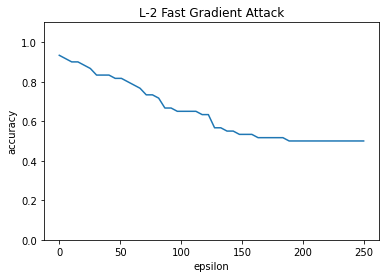

In [4]:
torch.cuda.empty_cache()
project="BMW"
max_rad = 250
title = 'bmw_adv_1'
config_path = '/nfs/students/winter-term-2020/project-1/project-1/audio_classification/configs/crnn_bmw.yaml'
pretrained_path = '/nfs/students/winter-term-2020/project-1/project-1/weights/final-adv/crnn-bmw-adv-sigma-1-epoch=30-val_acc=0.983.ckpt'
attack_model_for_adv(project_dir, config_path, pretrained_path, title, 
                                     project=project, attack_type = 'l2', max_radius=max_rad, save_folder=save_folder)

{'MODEL': {'NAME': 'LitCRNN', 'NUM_CLASSES': 6, 'CRNN': {'RANDOMISED_SMOOTHING': False, 'INCLUDE_TOP': True, 'INCLUDE_TRANSFORM': False, 'SMOOTH_ADV': True}}, 'DATASET': {'NAME': 'BMW', 'ANNOTATION_PATH': '/nfs/students/winter-term-2020/project-1/datasets/BMW/meta/bmw.csv', 'FOLDER_PATH': '/nfs/students/winter-term-2020/project-1/datasets/Brake_Noise', 'WEIGHT': 'NORMAL', 'VAL_FOLD': 2, 'AUGMENTATION': 'none', 'NOISE_PATH': '../datasets/MUSAN/free-sound/'}, 'DATALOADER': {'BATCH_SIZE': 8, 'NUM_WORKERS': 20}, 'TRANSFORM': {'HOP_LENGTH': 256}, 'ATTACK_VAL': {'EPS': 64, 'NUM_STEPS': 2, 'MTRAIN': 2, 'NO_GRAD': True, 'MULTI_NOISE': True}, 'LOSS': 'cross_entropy', 'SOLVER': {'LOG_PATH': '../logs/final-adv', 'NUM_GPUS': 1, 'MAX_EPOCH': 55, 'MIN_EPOCH': 1, 'LEARNING_RATE': 0.001, 'WEIGHT_DECAY': 0.001, 'STEP_SIZE': 25, 'SIGMA': 0.25, 'GAMMA': 0.5}, 'CHECKPOINT': {'SAVE_NAME': 'crnn-bmw', 'SAVE_PATH': '../weights/final-adv', 'SAVE_TOP_K': 1}, 'ATTACK': True}
Transformed raw audio into melspectr

/nfs/homedirs/vashisht/anaconda3/envs/project_1/lib/python3.7/site-packages/foolbox/models/pytorch.py:37: UserWarning: The PyTorch model is in training mode and therefore might not be deterministic. Call the eval() method to set it in evaluation mode if this is not intended.
  "The PyTorch model is in training mode and therefore might"


Generated attacks in 1364.47 seconds
[0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.8833333333333333, 0.8833333333333333, 0.8666666666666667, 0.8333333333333334, 0.7833333333333333, 0.7666666666666666, 0.75, 0.75, 0.75, 0.7333333333333334, 0.7166666666666667, 0.7166666666666667, 0.7166666666666667, 0.7166666666666667, 0.7166666666666667, 0.7166666666666667, 0.7166666666666667, 0.7, 0.7, 0.7, 0.6833333333333333, 0.6666666666666667, 0.6666666666666667, 0.6666666666666667, 0.65, 0.65, 0.65, 0.6333333333333333, 0.6333333333333333, 0.6333333333333333, 0.6333333333333333, 0.6333333333333333, 0.6166666666666667, 0.6166666666666667, 0.6166666666666667, 0.6166666666666667, 0.6166666666666667, 0.6166666666666667, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6]


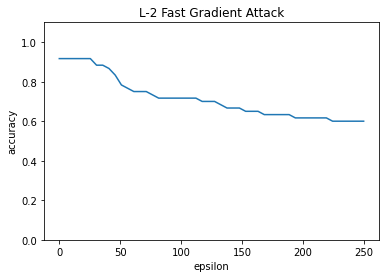

In [5]:
torch.cuda.empty_cache()
project="BMW"
max_rad = 250
title = 'bmw_adv_0.25_eps_256'
config_path = '/nfs/students/winter-term-2020/project-1/project-1/audio_classification/configs/crnn_bmw-0.25.yaml'
pretrained_path = '/nfs/students/winter-term-2020/project-1/project-1/weights/final-adv/crnn-bmw-adv-sigma-0.25-eps-256-epoch=18-val_acc=0.983.ckpt'
attack_model_for_adv(project_dir, config_path, pretrained_path, title, 
                                     project=project, attack_type = 'l2', max_radius=max_rad, save_folder=save_folder)

{'MODEL': {'NAME': 'LitCRNN', 'NUM_CLASSES': 6, 'CRNN': {'RANDOMISED_SMOOTHING': False, 'INCLUDE_TOP': True, 'INCLUDE_TRANSFORM': False, 'SMOOTH_ADV': True}}, 'DATASET': {'NAME': 'BMW', 'ANNOTATION_PATH': '/nfs/students/winter-term-2020/project-1/datasets/BMW/meta/bmw.csv', 'FOLDER_PATH': '/nfs/students/winter-term-2020/project-1/datasets/Brake_Noise', 'WEIGHT': 'NORMAL', 'VAL_FOLD': 2, 'AUGMENTATION': 'none', 'NOISE_PATH': '../datasets/MUSAN/free-sound/'}, 'DATALOADER': {'BATCH_SIZE': 8, 'NUM_WORKERS': 20}, 'TRANSFORM': {'HOP_LENGTH': 256}, 'ATTACK_VAL': {'EPS': 64, 'NUM_STEPS': 2, 'MTRAIN': 2, 'NO_GRAD': True, 'MULTI_NOISE': True}, 'LOSS': 'cross_entropy', 'SOLVER': {'LOG_PATH': '../logs/final-adv', 'NUM_GPUS': 1, 'MAX_EPOCH': 55, 'MIN_EPOCH': 1, 'LEARNING_RATE': 0.001, 'WEIGHT_DECAY': 0.001, 'STEP_SIZE': 25, 'SIGMA': 0.5, 'GAMMA': 0.5}, 'CHECKPOINT': {'SAVE_NAME': 'crnn-bmw', 'SAVE_PATH': '../weights/final-adv', 'SAVE_TOP_K': 1}, 'ATTACK': True}
Transformed raw audio into melspectro

/nfs/homedirs/vashisht/anaconda3/envs/project_1/lib/python3.7/site-packages/foolbox/models/pytorch.py:37: UserWarning: The PyTorch model is in training mode and therefore might not be deterministic. Call the eval() method to set it in evaluation mode if this is not intended.
  "The PyTorch model is in training mode and therefore might"


Generated attacks in 1363.80 seconds
[0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.9, 0.9, 0.9, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8166666666666667, 0.7833333333333333, 0.7833333333333333, 0.7666666666666666, 0.7333333333333334, 0.7333333333333334, 0.7166666666666667, 0.7166666666666667, 0.7, 0.6833333333333333, 0.6166666666666667, 0.6, 0.5666666666666667, 0.5666666666666667, 0.5666666666666667, 0.55, 0.55, 0.55, 0.5333333333333333, 0.5333333333333333, 0.5333333333333333, 0.5166666666666666, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


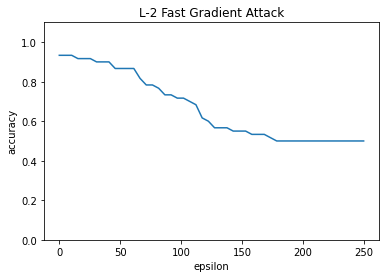

In [6]:
torch.cuda.empty_cache()
project="BMW"
max_rad = 250
title = 'bmw_adv_0.5_eps_256'
config_path = '/nfs/students/winter-term-2020/project-1/project-1/audio_classification/configs/crnn_bmw-0.5.yaml'
pretrained_path = '/nfs/students/winter-term-2020/project-1/project-1/weights/final-adv/crnn-bmw-adv-sigma-0.5-eps-256-epoch=44-val_acc=0.983.ckpt'
attack_model_for_adv(project_dir, config_path, pretrained_path, title, 
                                     project=project, attack_type = 'l2', max_radius=max_rad, save_folder=save_folder)

{'MODEL': {'NAME': 'LitCRNN', 'NUM_CLASSES': 6, 'CRNN': {'RANDOMISED_SMOOTHING': False, 'INCLUDE_TOP': True, 'INCLUDE_TRANSFORM': False, 'SMOOTH_ADV': True}}, 'DATASET': {'NAME': 'BMW', 'ANNOTATION_PATH': '/nfs/students/winter-term-2020/project-1/datasets/BMW/meta/bmw.csv', 'FOLDER_PATH': '/nfs/students/winter-term-2020/project-1/datasets/Brake_Noise', 'WEIGHT': 'NORMAL', 'VAL_FOLD': 2, 'AUGMENTATION': 'none', 'NOISE_PATH': '../datasets/MUSAN/free-sound/'}, 'DATALOADER': {'BATCH_SIZE': 8, 'NUM_WORKERS': 20}, 'TRANSFORM': {'HOP_LENGTH': 256}, 'ATTACK_VAL': {'EPS': 64, 'NUM_STEPS': 2, 'MTRAIN': 2, 'NO_GRAD': True, 'MULTI_NOISE': True}, 'LOSS': 'cross_entropy', 'SOLVER': {'LOG_PATH': '../logs/final-adv', 'NUM_GPUS': 1, 'MAX_EPOCH': 55, 'MIN_EPOCH': 1, 'LEARNING_RATE': 0.001, 'WEIGHT_DECAY': 0.001, 'STEP_SIZE': 25, 'SIGMA': 1, 'GAMMA': 0.5}, 'CHECKPOINT': {'SAVE_NAME': 'crnn-bmw', 'SAVE_PATH': '../weights/final-adv', 'SAVE_TOP_K': 1}, 'ATTACK': True}
Transformed raw audio into melspectrogr

/nfs/homedirs/vashisht/anaconda3/envs/project_1/lib/python3.7/site-packages/foolbox/models/pytorch.py:37: UserWarning: The PyTorch model is in training mode and therefore might not be deterministic. Call the eval() method to set it in evaluation mode if this is not intended.
  "The PyTorch model is in training mode and therefore might"


Generated attacks in 1365.05 seconds
[0.95, 0.95, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9166666666666666, 0.9, 0.8666666666666667, 0.85, 0.85, 0.85, 0.85, 0.85, 0.8333333333333334, 0.8166666666666667, 0.8166666666666667, 0.8, 0.8, 0.7833333333333333, 0.7666666666666666, 0.75, 0.7333333333333334, 0.7166666666666667, 0.7, 0.7, 0.6833333333333333, 0.6833333333333333, 0.6666666666666667, 0.65, 0.6333333333333333, 0.6333333333333333, 0.6333333333333333, 0.6333333333333333, 0.6333333333333333, 0.65, 0.65, 0.65, 0.65, 0.6666666666666667, 0.6666666666666667, 0.6666666666666667, 0.6666666666666667, 0.6666666666666667, 0.6666666666666667, 0.65, 0.6166666666666667, 0.6166666666666667, 0.6166666666666667, 0.6, 0.6]


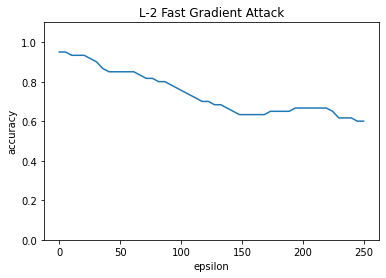

In [7]:
torch.cuda.empty_cache()
project="BMW"
max_rad = 250
title = 'bmw_adv_1_eps_256'
config_path = '/nfs/students/winter-term-2020/project-1/project-1/audio_classification/configs/crnn_bmw.yaml'
pretrained_path = '/nfs/students/winter-term-2020/project-1/project-1/weights/final-adv/crnn-bmw-adv-sigma-1-eps-256-epoch=25-val_acc=0.983.ckpt'
attack_model_for_adv(project_dir, config_path, pretrained_path, title, 
                                     project=project, attack_type = 'l2', max_radius=max_rad, save_folder=save_folder)

In [ ]:
## For Batch size = 3

{'MODEL': {'NAME': 'LitCRNN', 'NUM_CLASSES': 6, 'CRNN': {'RANDOMISED_SMOOTHING': True, 'INCLUDE_TOP': True, 'INCLUDE_TRANSFORM': False, 'SMOOTH_ADV': False}}, 'DATASET': {'NAME': 'BMW', 'ANNOTATION_PATH': '/nfs/students/winter-term-2020/project-1/datasets/BMW/meta/bmw.csv', 'FOLDER_PATH': '/nfs/students/winter-term-2020/project-1/datasets/Brake_Noise', 'WEIGHT': 'NORMAL', 'VAL_FOLD': 2, 'AUGMENTATION': 'none', 'NOISE_PATH': '../datasets/MUSAN/free-sound/'}, 'DATALOADER': {'BATCH_SIZE': 8, 'NUM_WORKERS': 20}, 'TRANSFORM': {'HOP_LENGTH': 256}, 'ATTACK_VAL': {'EPS': 64, 'NUM_STEPS': 2, 'MTRAIN': 2, 'NO_GRAD': True, 'MULTI_NOISE': True}, 'LOSS': 'cross_entropy', 'SOLVER': {'LOG_PATH': '../logs/final-adv', 'NUM_GPUS': 1, 'MAX_EPOCH': 55, 'MIN_EPOCH': 1, 'LEARNING_RATE': 0.001, 'WEIGHT_DECAY': 0.001, 'STEP_SIZE': 25, 'SIGMA': 0.25, 'GAMMA': 0.5}, 'CHECKPOINT': {'SAVE_NAME': 'crnn-bmw', 'SAVE_PATH': '../weights/final-adv', 'SAVE_TOP_K': 1}, 'ATTACK': True}
Transformed raw audio into melspectr

/nfs/homedirs/vashisht/anaconda3/envs/project_1/lib/python3.7/site-packages/foolbox/models/pytorch.py:37: UserWarning: The PyTorch model is in training mode and therefore might not be deterministic. Call the eval() method to set it in evaluation mode if this is not intended.
  "The PyTorch model is in training mode and therefore might"


Generated attacks in 1372.65 seconds
[0.9333333333333333, 0.9, 0.9, 0.9, 0.8666666666666667, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8166666666666667, 0.7833333333333333, 0.7833333333333333, 0.7833333333333333, 0.7833333333333333, 0.7833333333333333, 0.7833333333333333, 0.7833333333333333, 0.7666666666666666, 0.7666666666666666, 0.7666666666666666, 0.7666666666666666, 0.7666666666666666, 0.7666666666666666, 0.7666666666666666, 0.7666666666666666, 0.7666666666666666, 0.7666666666666666, 0.7666666666666666, 0.7666666666666666, 0.7666666666666666, 0.7666666666666666, 0.75, 0.7333333333333334, 0.7333333333333334, 0.7166666666666667, 0.7166666666666667, 0.7166666666666667, 0.7166666666666667, 0.7166666666666667, 0.7166666666666667, 0.7166666666666667, 0.7166666666666667, 0.7166666666666667, 0.7166666666666667, 0.7166666666666667, 0.7, 0.7, 0.6666666666666667, 0.6333333333333333, 0.6333333333333333, 0.6333333333333333]


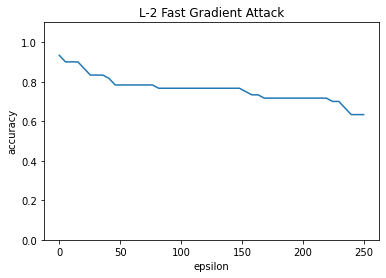

In [8]:
torch.cuda.empty_cache()
project="BMW"
max_rad = 250
title = 'bmw_rs_0.25_3'
config_path = '/nfs/students/winter-term-2020/project-1/project-1/audio_classification/configs/crnn_bmw-0.25-rs.yaml'
pretrained_path = '/nfs/students/winter-term-2020/project-1/project-1/weights/week-6/randomised-smoothing/crnn-bmw-epoch=38-val_acc=1.000.ckpt'
attack_model_for_randomize_smoothing(project_dir, config_path, pretrained_path, title, 
                                     project=project, attack_type = 'l2', max_radius=max_rad, save_folder=save_folder)

{'MODEL': {'NAME': 'LitCRNN', 'NUM_CLASSES': 6, 'CRNN': {'RANDOMISED_SMOOTHING': True, 'INCLUDE_TOP': True, 'INCLUDE_TRANSFORM': False, 'SMOOTH_ADV': False}}, 'DATASET': {'NAME': 'BMW', 'ANNOTATION_PATH': '/nfs/students/winter-term-2020/project-1/datasets/BMW/meta/bmw.csv', 'FOLDER_PATH': '/nfs/students/winter-term-2020/project-1/datasets/Brake_Noise', 'WEIGHT': 'NORMAL', 'VAL_FOLD': 2, 'AUGMENTATION': 'none', 'NOISE_PATH': '../datasets/MUSAN/free-sound/'}, 'DATALOADER': {'BATCH_SIZE': 8, 'NUM_WORKERS': 20}, 'TRANSFORM': {'HOP_LENGTH': 256}, 'ATTACK_VAL': {'EPS': 64, 'NUM_STEPS': 2, 'MTRAIN': 2, 'NO_GRAD': True, 'MULTI_NOISE': True}, 'LOSS': 'cross_entropy', 'SOLVER': {'LOG_PATH': '../logs/final-adv', 'NUM_GPUS': 1, 'MAX_EPOCH': 55, 'MIN_EPOCH': 1, 'LEARNING_RATE': 0.001, 'WEIGHT_DECAY': 0.001, 'STEP_SIZE': 25, 'SIGMA': 0.5, 'GAMMA': 0.5}, 'CHECKPOINT': {'SAVE_NAME': 'crnn-bmw', 'SAVE_PATH': '../weights/final-adv', 'SAVE_TOP_K': 1}, 'ATTACK': True}
Transformed raw audio into melspectro

/nfs/homedirs/vashisht/anaconda3/envs/project_1/lib/python3.7/site-packages/foolbox/models/pytorch.py:37: UserWarning: The PyTorch model is in training mode and therefore might not be deterministic. Call the eval() method to set it in evaluation mode if this is not intended.
  "The PyTorch model is in training mode and therefore might"


Generated attacks in 1378.06 seconds
[0.9, 0.9, 0.9, 0.8833333333333333, 0.8833333333333333, 0.8666666666666667, 0.85, 0.8166666666666667, 0.8166666666666667, 0.8166666666666667, 0.8166666666666667, 0.8166666666666667, 0.8, 0.7666666666666666, 0.7666666666666666, 0.7333333333333334, 0.7333333333333334, 0.7333333333333334, 0.7333333333333334, 0.7166666666666667, 0.7166666666666667, 0.7166666666666667, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.6666666666666667, 0.6666666666666667, 0.6333333333333333, 0.6333333333333333, 0.6333333333333333, 0.6, 0.5833333333333333, 0.5833333333333333, 0.5833333333333333, 0.5833333333333333, 0.5833333333333333, 0.5833333333333333, 0.5666666666666667, 0.5833333333333333, 0.5833333333333333, 0.5833333333333333, 0.5833333333333333, 0.5833333333333333, 0.5833333333333333, 0.5833333333333333, 0.5833333333333333, 0.5666666666666667]


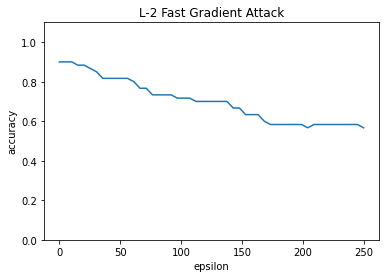

In [9]:
torch.cuda.empty_cache()
project="BMW"
max_rad = 250
title = 'bmw_rs_0.5_3'
config_path = '/nfs/students/winter-term-2020/project-1/project-1/audio_classification/configs/crnn_bmw-0.5-rs.yaml'
pretrained_path = '/nfs/students/winter-term-2020/project-1/project-1/weights/week-6/randomised-smoothing/crnn-bmw-epoch=42-val_acc=1.000.ckpt'
attack_model_for_randomize_smoothing(project_dir, config_path, pretrained_path, title, 
                                     project=project, attack_type = 'l2', max_radius=max_rad, save_folder=save_folder)

In [ ]:
project="BMW"
max_rad = 250
title = 'bmw_rs_1_3'
config_path = '/nfs/students/winter-term-2020/project-1/project-1/audio_classification/configs/crnn_bmw-rs.yaml'
pretrained_path = '/nfs/students/winter-term-2020/project-1/project-1/weights/week-6/randomised-smoothing/crnn-bmw-epoch=24-val_acc=1.000.ckpt'
attack_model_for_randomize_smoothing(project_dir, config_path, pretrained_path, title, 
                                     project=project, attack_type = 'l2', max_radius=max_rad, save_folder=save_folder)

{'MODEL': {'NAME': 'LitCRNN', 'NUM_CLASSES': 6, 'CRNN': {'RANDOMISED_SMOOTHING': True, 'INCLUDE_TOP': True, 'INCLUDE_TRANSFORM': False, 'SMOOTH_ADV': False}}, 'DATASET': {'NAME': 'BMW', 'ANNOTATION_PATH': '/nfs/students/winter-term-2020/project-1/datasets/BMW/meta/bmw.csv', 'FOLDER_PATH': '/nfs/students/winter-term-2020/project-1/datasets/Brake_Noise', 'WEIGHT': 'NORMAL', 'VAL_FOLD': 2, 'AUGMENTATION': 'none', 'NOISE_PATH': '../datasets/MUSAN/free-sound/'}, 'DATALOADER': {'BATCH_SIZE': 8, 'NUM_WORKERS': 20}, 'TRANSFORM': {'HOP_LENGTH': 256}, 'ATTACK_VAL': {'EPS': 64, 'NUM_STEPS': 2, 'MTRAIN': 2, 'NO_GRAD': True, 'MULTI_NOISE': True}, 'LOSS': 'cross_entropy', 'SOLVER': {'LOG_PATH': '../logs/final-adv', 'NUM_GPUS': 1, 'MAX_EPOCH': 55, 'MIN_EPOCH': 1, 'LEARNING_RATE': 0.001, 'WEIGHT_DECAY': 0.001, 'STEP_SIZE': 25, 'SIGMA': 1, 'GAMMA': 0.5}, 'CHECKPOINT': {'SAVE_NAME': 'crnn-bmw', 'SAVE_PATH': '../weights/final-adv', 'SAVE_TOP_K': 1}, 'ATTACK': True}
Transformed raw audio into melspectrogr

/nfs/homedirs/vashisht/anaconda3/envs/project_1/lib/python3.7/site-packages/foolbox/models/pytorch.py:37: UserWarning: The PyTorch model is in training mode and therefore might not be deterministic. Call the eval() method to set it in evaluation mode if this is not intended.
  "The PyTorch model is in training mode and therefore might"


{'MODEL': {'NAME': 'LitCRNN', 'NUM_CLASSES': 10, 'CRNN': {'RANDOMISED_SMOOTHING': True, 'INCLUDE_TOP': True, 'INCLUDE_TRANSFORM': False}}, 'DATASET': {'NAME': 'UrbanSounds8K', 'ANNOTATION_PATH': '/nfs/students/winter-term-2020/project-1/datasets/UrbanSound8K/metadata/UrbanSound8K.csv', 'FILE_PATH': '/nfs/students/winter-term-2020/project-1/datasets/UrbanSound8K/audio/', 'VAL_FOLD': 10, 'WEIGHT': 'None'}, 'DATALOADER': {'BATCH_SIZE': 12, 'NUM_WORKERS': 20}, 'TRANSFORM': {'HOP_LENGTH': 256}, 'LOSS': 'cross_entropy', 'SOLVER': {'LOG_PATH': '../logs/us8k/', 'NUM_GPUS': 1, 'MAX_EPOCH': 125, 'MIN_EPOCH': 1, 'LEARNING_RATE': 0.001, 'WEIGHT_DECAY': 0.01, 'STEP_SIZE': 25, 'SIGMA': 0.25, 'GAMMA': 0.5}, 'CHECKPOINT': {'SAVE_NAME': 'crnn-us8k', 'SAVE_PATH': '../weights', 'SAVE_TOP_K': 1}, 'ATTACK': True}
Transformed raw audio into melspectrogram in dataloader.
Range of the input data is (-100.000000, 41.999760)
model device True


/nfs/homedirs/vashisht/anaconda3/envs/project_1/lib/python3.7/site-packages/foolbox/models/pytorch.py:37: UserWarning: The PyTorch model is in training mode and therefore might not be deterministic. Call the eval() method to set it in evaluation mode if this is not intended.
  "The PyTorch model is in training mode and therefore might"


Generated attacks in 233.96 seconds
tensor([0.9167, 0.1833, 0.0500, 0.0333, 0.0500, 0.1000, 0.2000, 0.2333, 0.2167,
        0.2333, 0.2500, 0.2667, 0.2667, 0.2833, 0.2833, 0.3167, 0.3500, 0.3667,
        0.4000, 0.4167], dtype=torch.float64)


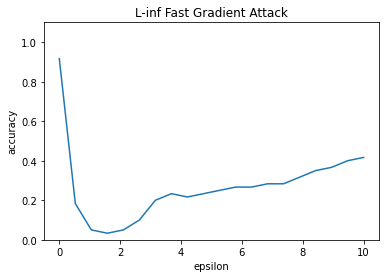

In [2]:
torch.cuda.empty_cache()
project="UrbanSound8k"
max_rad = 10
title = 'us8k_rs_0.25'
config_path = '/nfs/students/winter-term-2020/project-1/project-1/audio_classification/configs/crnn_urbansound8k-0.25.yaml'
pretrained_path = '/nfs/students/winter-term-2020/project-1/project-1/weights/week-6/randomised-smoothing/crnn-us8k-epoch=18-val_acc=0.667.ckpt'
attack_model_for_randomize_smoothing(project_dir, config_path, pretrained_path, title, 
                                     project=project, attack_type = 'linf', max_radius=max_rad, save_folder=save_folder)

{'MODEL': {'NAME': 'LitCRNN', 'NUM_CLASSES': 10, 'CRNN': {'RANDOMISED_SMOOTHING': True, 'INCLUDE_TOP': True, 'INCLUDE_TRANSFORM': False}}, 'DATASET': {'NAME': 'UrbanSounds8K', 'ANNOTATION_PATH': '/nfs/students/winter-term-2020/project-1/datasets/UrbanSound8K/metadata/UrbanSound8K.csv', 'FILE_PATH': '/nfs/students/winter-term-2020/project-1/datasets/UrbanSound8K/audio/', 'VAL_FOLD': 10, 'WEIGHT': 'None'}, 'DATALOADER': {'BATCH_SIZE': 12, 'NUM_WORKERS': 20}, 'TRANSFORM': {'HOP_LENGTH': 256}, 'LOSS': 'cross_entropy', 'SOLVER': {'LOG_PATH': '../logs/us8k/', 'NUM_GPUS': 1, 'MAX_EPOCH': 125, 'MIN_EPOCH': 1, 'LEARNING_RATE': 0.001, 'WEIGHT_DECAY': 0.01, 'STEP_SIZE': 25, 'SIGMA': 0.5, 'GAMMA': 0.5}, 'CHECKPOINT': {'SAVE_NAME': 'crnn-us8k', 'SAVE_PATH': '../weights', 'SAVE_TOP_K': 1}, 'ATTACK': True}
Transformed raw audio into melspectrogram in dataloader.
Range of the input data is (-100.000000, 41.999760)
model device True


/nfs/homedirs/vashisht/anaconda3/envs/project_1/lib/python3.7/site-packages/foolbox/models/pytorch.py:37: UserWarning: The PyTorch model is in training mode and therefore might not be deterministic. Call the eval() method to set it in evaluation mode if this is not intended.
  "The PyTorch model is in training mode and therefore might"


Generated attacks in 234.57 seconds
tensor([0.9833, 0.0667, 0.0500, 0.0167, 0.0167, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0167, 0.0167, 0.0167, 0.0167, 0.0167, 0.0167, 0.0167,
        0.0000, 0.0000], dtype=torch.float64)


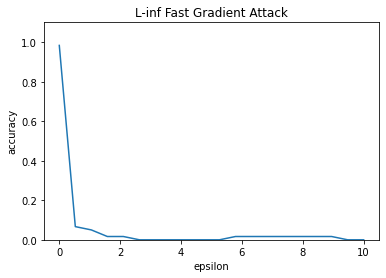

In [3]:
torch.cuda.empty_cache()
project="UrbanSound8k"
max_rad = 10
title = 'us8k_audio_rs_0.5'
config_path = '/nfs/students/winter-term-2020/project-1/project-1/audio_classification/configs/crnn_urbansound8k-0.5.yaml'
pretrained_path = '/nfs/students/winter-term-2020/project-1/project-1/weights/week-6/randomised-smoothing/crnn-us8k-epoch=31-val_acc=0.724.ckpt'
attack_model_for_randomize_smoothing(project_dir, config_path, pretrained_path, title, 
                                     project=project, attack_type = 'linf', max_radius=max_rad, save_folder=save_folder)

{'MODEL': {'NAME': 'LitCRNN', 'NUM_CLASSES': 10, 'CRNN': {'RANDOMISED_SMOOTHING': True, 'INCLUDE_TOP': True, 'INCLUDE_TRANSFORM': False}}, 'DATASET': {'NAME': 'UrbanSounds8K', 'ANNOTATION_PATH': '/nfs/students/winter-term-2020/project-1/datasets/UrbanSound8K/metadata/UrbanSound8K.csv', 'FILE_PATH': '/nfs/students/winter-term-2020/project-1/datasets/UrbanSound8K/audio/', 'VAL_FOLD': 10, 'WEIGHT': 'None'}, 'DATALOADER': {'BATCH_SIZE': 12, 'NUM_WORKERS': 20}, 'TRANSFORM': {'HOP_LENGTH': 256}, 'LOSS': 'cross_entropy', 'SOLVER': {'LOG_PATH': '../logs/us8k/', 'NUM_GPUS': 1, 'MAX_EPOCH': 125, 'MIN_EPOCH': 1, 'LEARNING_RATE': 0.001, 'WEIGHT_DECAY': 0.01, 'STEP_SIZE': 25, 'SIGMA': 1, 'GAMMA': 0.5}, 'CHECKPOINT': {'SAVE_NAME': 'crnn-us8k', 'SAVE_PATH': '../weights', 'SAVE_TOP_K': 1}, 'ATTACK': True}
Transformed raw audio into melspectrogram in dataloader.
Range of the input data is (-100.000000, 41.999760)
model device True


/nfs/homedirs/vashisht/anaconda3/envs/project_1/lib/python3.7/site-packages/foolbox/models/pytorch.py:37: UserWarning: The PyTorch model is in training mode and therefore might not be deterministic. Call the eval() method to set it in evaluation mode if this is not intended.
  "The PyTorch model is in training mode and therefore might"


Generated attacks in 235.03 seconds
tensor([0.9667, 0.1500, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0167, 0.0167,
        0.0167, 0.0167, 0.0167, 0.0167, 0.0167, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000], dtype=torch.float64)


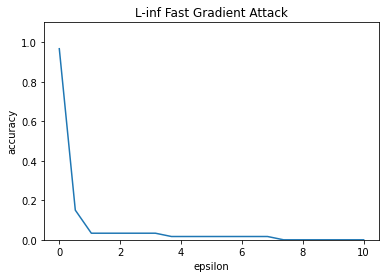

In [4]:
torch.cuda.empty_cache()
project="UrbanSound8k"
max_rad = 10
title = 'us8k_rs_1'
config_path = '/nfs/students/winter-term-2020/project-1/project-1/audio_classification/configs/crnn_urbansound8k.yaml'
pretrained_path = '/nfs/students/winter-term-2020/project-1/project-1/weights/week-6/randomised-smoothing/crnn-us8k-epoch=19-val_acc=0.708.ckpt'
attack_model_for_randomize_smoothing(project_dir, config_path, pretrained_path, title, 
                                     project=project, attack_type = 'linf', max_radius=max_rad, save_folder=save_folder)

In [ ]:
torch.cuda.empty_cache()
project="UrbanSound8k"
max_rad = 250
title = 'us8k_rs_0.25'
config_path = '/nfs/students/winter-term-2020/project-1/project-1/audio_classification/configs/crnn_urbansound8k-0.25.yaml'
pretrained_path = '/nfs/students/winter-term-2020/project-1/project-1/weights/week-6/randomised-smoothing/crnn-us8k-epoch=18-val_acc=0.667.ckpt'
attack_model_for_randomize_smoothing(project_dir, config_path, pretrained_path, title, 
                                     project=project, attack_type = 'l2', max_radius=max_rad, save_folder=save_folder)

In [ ]:
torch.cuda.empty_cache()
project="UrbanSound8k"
max_rad = 250
title = 'us8k_audio_rs_0.5'
config_path = '/nfs/students/winter-term-2020/project-1/project-1/audio_classification/configs/crnn_urbansound8k-0.5.yaml'
pretrained_path = '/nfs/students/winter-term-2020/project-1/project-1/weights/week-6/randomised-smoothing/crnn-us8k-epoch=31-val_acc=0.724.ckpt'
attack_model_for_randomize_smoothing(project_dir, config_path, pretrained_path, title, 
                                     project=project, attack_type = 'l2', max_radius=max_rad, save_folder=save_folder)

In [ ]:
torch.cuda.empty_cache()
project="UrbanSound8k"
max_rad = 250
title = 'us8k_rs_1'
config_path = '/nfs/students/winter-term-2020/project-1/project-1/audio_classification/configs/crnn_urbansound8k.yaml'
pretrained_path = '/nfs/students/winter-term-2020/project-1/project-1/weights/week-6/randomised-smoothing/crnn-us8k-epoch=19-val_acc=0.708.ckpt'
attack_model_for_randomize_smoothing(project_dir, config_path, pretrained_path, title, 
                                     project=project, attack_type = 'l2', max_radius=max_rad, save_folder=save_folder)

{'MODEL': {'NAME': 'LitCRNN', 'NUM_CLASSES': 6, 'CRNN': {'RANDOMISED_SMOOTHING': True, 'INCLUDE_TOP': True, 'INCLUDE_TRANSFORM': False}}, 'DATASET': {'NAME': 'BMW', 'ANNOTATION_PATH': '/nfs/students/winter-term-2020/project-1/datasets/BMW/meta/bmw.csv', 'FOLDER_PATH': '/nfs/students/winter-term-2020/project-1/datasets/Brake_Noise', 'WEIGHT': 'NORMAL', 'VAL_FOLD': 1, 'AUGMENTATION': 'none', 'NOISE_PATH': '../datasets/MUSAN/free-sound/'}, 'DATALOADER': {'BATCH_SIZE': 8, 'NUM_WORKERS': 20}, 'TRANSFORM': {'HOP_LENGTH': 256}, 'LOSS': 'cross_entropy', 'SOLVER': {'LOG_PATH': '../logs/bmw/', 'NUM_GPUS': 1, 'MAX_EPOCH': 150, 'MIN_EPOCH': 1, 'LEARNING_RATE': 0.001, 'WEIGHT_DECAY': 0.001, 'STEP_SIZE': 25, 'SIGMA': 0.25, 'GAMMA': 0.5}, 'CHECKPOINT': {'SAVE_NAME': 'crnn-bmw', 'SAVE_PATH': '../weights/bmw/', 'SAVE_TOP_K': 1}, 'ATTACK': True}
Transformed raw audio into melspectrogram in dataloader.
Data augmentation for BMW dataset: none
Range of the input data is (-82.704231, 41.936913)


/nfs/homedirs/vashisht/anaconda3/envs/project_1/lib/python3.7/site-packages/foolbox/models/pytorch.py:37: UserWarning: The PyTorch model is in training mode and therefore might not be deterministic. Call the eval() method to set it in evaluation mode if this is not intended.
  "The PyTorch model is in training mode and therefore might"


Generated attacks in 37350.23 seconds
tensor([0.9333, 0.6833, 0.5000, 0.4500, 0.3833, 0.3333, 0.3333, 0.2833, 0.2667,
        0.2333, 0.2500, 0.2167, 0.2167, 0.1667, 0.1500, 0.0833, 0.0833, 0.0833,
        0.0833, 0.0833], dtype=torch.float64)


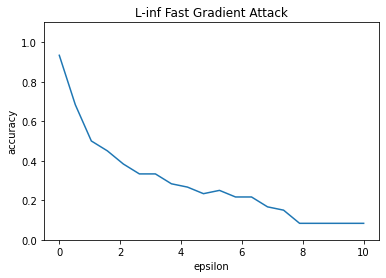

In [2]:
torch.cuda.empty_cache()
project="BMW"
max_rad = 10
title = 'bmw_rs_0.25'
config_path = '/nfs/students/winter-term-2020/project-1/project-1/audio_classification/configs/crnn_bmw-0.25.yaml'
pretrained_path = '/nfs/students/winter-term-2020/project-1/project-1/weights/week-6/randomised-smoothing/crnn-bmw-epoch=38-val_acc=1.000.ckpt'
attack_model_for_randomize_smoothing(project_dir, config_path, pretrained_path, title, 
                                     project=project, attack_type = 'linf', max_radius=max_rad, save_folder=save_folder)

{'MODEL': {'NAME': 'LitCRNN', 'NUM_CLASSES': 6, 'CRNN': {'RANDOMISED_SMOOTHING': True, 'INCLUDE_TOP': True, 'INCLUDE_TRANSFORM': False}}, 'DATASET': {'NAME': 'BMW', 'ANNOTATION_PATH': '/nfs/students/winter-term-2020/project-1/datasets/BMW/meta/bmw.csv', 'FOLDER_PATH': '/nfs/students/winter-term-2020/project-1/datasets/Brake_Noise', 'WEIGHT': 'NORMAL', 'VAL_FOLD': 1, 'AUGMENTATION': 'none', 'NOISE_PATH': '../datasets/MUSAN/free-sound/'}, 'DATALOADER': {'BATCH_SIZE': 8, 'NUM_WORKERS': 20}, 'TRANSFORM': {'HOP_LENGTH': 256}, 'LOSS': 'cross_entropy', 'SOLVER': {'LOG_PATH': '../logs/bmw/', 'NUM_GPUS': 1, 'MAX_EPOCH': 150, 'MIN_EPOCH': 1, 'LEARNING_RATE': 0.001, 'WEIGHT_DECAY': 0.001, 'STEP_SIZE': 25, 'SIGMA': 0.5, 'GAMMA': 0.5}, 'CHECKPOINT': {'SAVE_NAME': 'crnn-bmw', 'SAVE_PATH': '../weights/bmw/', 'SAVE_TOP_K': 1}, 'ATTACK': True}
Transformed raw audio into melspectrogram in dataloader.
Data augmentation for BMW dataset: none
Range of the input data is (-82.704231, 41.936913)
model device 

/nfs/homedirs/vashisht/anaconda3/envs/project_1/lib/python3.7/site-packages/foolbox/models/pytorch.py:37: UserWarning: The PyTorch model is in training mode and therefore might not be deterministic. Call the eval() method to set it in evaluation mode if this is not intended.
  "The PyTorch model is in training mode and therefore might"


Generated attacks in 41891.43 seconds
tensor([0.9000, 0.6167, 0.4333, 0.3833, 0.3833, 0.3667, 0.3667, 0.3333, 0.3333,
        0.3000, 0.2833, 0.2833, 0.2833, 0.2833, 0.2500, 0.2500, 0.2500, 0.2500,
        0.2500, 0.2500], dtype=torch.float64)


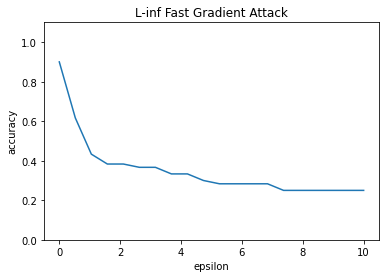

In [2]:
torch.cuda.empty_cache()
device = torch.device('cpu')
project="BMW"
max_rad = 10
title = 'bmw_rs_0.5'
config_path = '/nfs/students/winter-term-2020/project-1/project-1/audio_classification/configs/crnn_bmw-0.5.yaml'
pretrained_path = '/nfs/students/winter-term-2020/project-1/project-1/weights/week-6/randomised-smoothing/crnn-bmw-epoch=42-val_acc=1.000.ckpt'
attack_model_for_randomize_smoothing(project_dir, config_path, pretrained_path, title, 
                                     project=project, attack_type = 'linf', max_radius=max_rad, save_folder=save_folder)

{'MODEL': {'NAME': 'LitCRNN', 'NUM_CLASSES': 6, 'CRNN': {'RANDOMISED_SMOOTHING': True, 'INCLUDE_TOP': True, 'INCLUDE_TRANSFORM': False}}, 'DATASET': {'NAME': 'BMW', 'ANNOTATION_PATH': '/nfs/students/winter-term-2020/project-1/datasets/BMW/meta/bmw.csv', 'FOLDER_PATH': '/nfs/students/winter-term-2020/project-1/datasets/Brake_Noise', 'WEIGHT': 'NORMAL', 'VAL_FOLD': 1, 'AUGMENTATION': 'none', 'NOISE_PATH': '../datasets/MUSAN/free-sound/'}, 'DATALOADER': {'BATCH_SIZE': 8, 'NUM_WORKERS': 20}, 'TRANSFORM': {'HOP_LENGTH': 256}, 'LOSS': 'cross_entropy', 'SOLVER': {'LOG_PATH': '../logs/bmw/', 'NUM_GPUS': 1, 'MAX_EPOCH': 150, 'MIN_EPOCH': 1, 'LEARNING_RATE': 0.001, 'WEIGHT_DECAY': 0.001, 'STEP_SIZE': 25, 'SIGMA': 1, 'GAMMA': 0.5}, 'CHECKPOINT': {'SAVE_NAME': 'crnn-bmw', 'SAVE_PATH': '../weights/bmw/', 'SAVE_TOP_K': 1}, 'ATTACK': True}
Transformed raw audio into melspectrogram in dataloader.
Data augmentation for BMW dataset: none
Range of the input data is (-82.704231, 41.936913)
model device Fa

/nfs/homedirs/vashisht/anaconda3/envs/project_1/lib/python3.7/site-packages/foolbox/models/pytorch.py:37: UserWarning: The PyTorch model is in training mode and therefore might not be deterministic. Call the eval() method to set it in evaluation mode if this is not intended.
  "The PyTorch model is in training mode and therefore might"


Generated attacks in 41593.95 seconds
tensor([0.9833, 0.8333, 0.5500, 0.4000, 0.2833, 0.2667, 0.2333, 0.2333, 0.2000,
        0.1833, 0.1667, 0.1500, 0.1333, 0.1000, 0.1000, 0.0667, 0.0667, 0.0667,
        0.0667, 0.0667], dtype=torch.float64)


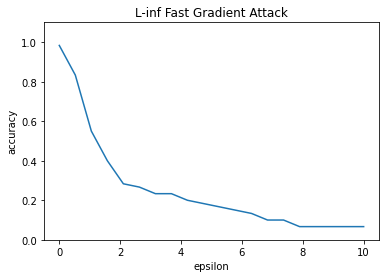

In [3]:
project="BMW"
max_rad = 10
title = 'bmw_rs_1'
config_path = '/nfs/students/winter-term-2020/project-1/project-1/audio_classification/configs/crnn_bmw.yaml'
pretrained_path = '/nfs/students/winter-term-2020/project-1/project-1/weights/week-6/randomised-smoothing/crnn-bmw-epoch=24-val_acc=1.000.ckpt'
attack_model_for_randomize_smoothing(project_dir, config_path, pretrained_path, title, 
                                     project=project, attack_type = 'linf', max_radius=max_rad, save_folder=save_folder)

{'MODEL': {'NAME': 'LitCRNN', 'NUM_CLASSES': 6, 'CRNN': {'RANDOMISED_SMOOTHING': True, 'INCLUDE_TOP': True, 'INCLUDE_TRANSFORM': False}}, 'DATASET': {'NAME': 'BMW', 'ANNOTATION_PATH': '/nfs/students/winter-term-2020/project-1/datasets/BMW/meta/bmw.csv', 'FOLDER_PATH': '/nfs/students/winter-term-2020/project-1/datasets/Brake_Noise', 'WEIGHT': 'NORMAL', 'VAL_FOLD': 1, 'AUGMENTATION': 'none', 'NOISE_PATH': '../datasets/MUSAN/free-sound/'}, 'DATALOADER': {'BATCH_SIZE': 8, 'NUM_WORKERS': 20}, 'TRANSFORM': {'HOP_LENGTH': 256}, 'LOSS': 'cross_entropy', 'SOLVER': {'LOG_PATH': '../logs/bmw/', 'NUM_GPUS': 1, 'MAX_EPOCH': 150, 'MIN_EPOCH': 1, 'LEARNING_RATE': 0.001, 'WEIGHT_DECAY': 0.001, 'STEP_SIZE': 25, 'SIGMA': 0.5, 'GAMMA': 0.5}, 'CHECKPOINT': {'SAVE_NAME': 'crnn-bmw', 'SAVE_PATH': '../weights/bmw/', 'SAVE_TOP_K': 1}, 'ATTACK': True}
Transformed raw audio into melspectrogram in dataloader.
Data augmentation for BMW dataset: none
Range of the input data is (-82.704231, 41.936913)
model device 

/nfs/homedirs/vashisht/anaconda3/envs/project_1/lib/python3.7/site-packages/foolbox/models/pytorch.py:37: UserWarning: The PyTorch model is in training mode and therefore might not be deterministic. Call the eval() method to set it in evaluation mode if this is not intended.
  "The PyTorch model is in training mode and therefore might"


Generated attacks in 98953.75 seconds
tensor([0.9000, 0.9000, 0.9000, 0.8833, 0.8833, 0.8667, 0.8500, 0.8500, 0.8167,
        0.8167, 0.8000, 0.7833, 0.7500, 0.7500, 0.7500, 0.7333, 0.7333, 0.7167,
        0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.7000, 0.6833, 0.6833, 0.6500,
        0.6167, 0.6167, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000,
        0.5667, 0.5667, 0.5333, 0.5333, 0.5333, 0.5333, 0.5167, 0.5167, 0.5167,
        0.5000, 0.5000, 0.5000, 0.5000, 0.4833], dtype=torch.float64)


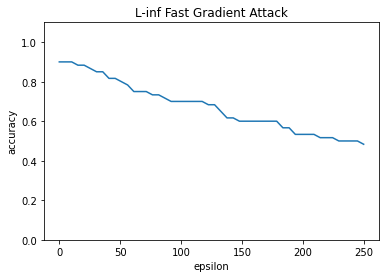

In [2]:
torch.cuda.empty_cache()
project="BMW"
max_rad = 250
title = 'bmw_rs_0.5'
config_path = '/nfs/students/winter-term-2020/project-1/project-1/audio_classification/configs/crnn_bmw-0.5.yaml'
pretrained_path = '/nfs/students/winter-term-2020/project-1/project-1/weights/week-6/randomised-smoothing/crnn-bmw-epoch=42-val_acc=1.000.ckpt'
attack_model_for_randomize_smoothing(project_dir, config_path, pretrained_path, title, 
                                     project=project, attack_type = 'l2', max_radius=max_rad, save_folder=save_folder)

In [ ]:
project="BMW"
max_rad = 250
title = 'bmw_rs_1'
config_path = '/nfs/students/winter-term-2020/project-1/project-1/audio_classification/configs/crnn_bmw.yaml'
pretrained_path = '/nfs/students/winter-term-2020/project-1/project-1/weights/bmw/week-7/crnn-bmw-epoch=36-val_acc=1.000.ckpt'
attack_model(project_dir, config_path, pretrained_path, title, 
                                     project=project, max_radius=max_rad, save_folder=save_folder)

{'MODEL': {'NAME': 'LitCRNN', 'NUM_CLASSES': 6, 'CRNN': {'RANDOMISED_SMOOTHING': False, 'INCLUDE_TOP': True, 'INCLUDE_TRANSFORM': False, 'ATTACK': False}}, 'DATASET': {'NAME': 'BMW', 'ANNOTATION_PATH': '/nfs/students/winter-term-2020/project-1/datasets/BMW/meta/bmw.csv', 'FOLDER_PATH': '/nfs/students/winter-term-2020/project-1/datasets/Brake_Noise', 'WEIGHT': 'NORMAL', 'VAL_FOLD': 2, 'AUGMENTATION': 'none', 'NOISE_PATH': '../datasets/MUSAN/free-sound/'}, 'DATALOADER': {'BATCH_SIZE': 8, 'NUM_WORKERS': 20}, 'TRANSFORM': {'HOP_LENGTH': 256}, 'LOSS': 'cross_entropy', 'SOLVER': {'LOG_PATH': '../logs/bmw/week-7', 'NUM_GPUS': 1, 'MAX_EPOCH': 50, 'MIN_EPOCH': 1, 'LEARNING_RATE': 0.001, 'WEIGHT_DECAY': 0.001, 'STEP_SIZE': 25, 'SIGMA': 1, 'GAMMA': 0.5}, 'CHECKPOINT': {'SAVE_NAME': 'crnn-bmw', 'SAVE_PATH': '../weights/bmw/week-7', 'SAVE_TOP_K': 1}, 'ATTACK': True}
Transformed raw audio into melspectrogram in dataloader.
Data augmentation for BMW dataset: none
Range of the input data is (-82.70423

/nfs/homedirs/vashisht/anaconda3/envs/project_1/lib/python3.7/site-packages/foolbox/models/pytorch.py:37: UserWarning: The PyTorch model is in training mode and therefore might not be deterministic. Call the eval() method to set it in evaluation mode if this is not intended.
  "The PyTorch model is in training mode and therefore might"


RuntimeError: 'lengths' argument should be a 1D CPU int64 tensor, but got 0D cpu Long tensor

In [ ]:
torch.cuda.empty_cache()
project="BMW"
max_rad = 250
title = 'bmw_rs_0.25'
config_path = '/nfs/students/winter-term-2020/project-1/project-1/audio_classification/configs/crnn_bmw-0.25.yaml'
pretrained_path = '/nfs/students/winter-term-2020/project-1/project-1/weights/week-6/randomised-smoothing/crnn-bmw-epoch=38-val_acc=1.000.ckpt'
attack_model_for_randomize_smoothing(project_dir, config_path, pretrained_path, title, 
                                     project=project, attack_type = 'l2', max_radius=max_rad, save_folder=save_folder)